In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

the datset was not seperated by comma, instead by ';'.

In [32]:
import csv

# Define the input and output file names
input_file = r'PWC Digital Intell dataset\bank-additional-full.csv'
output_file = 'dataset.csv'

# Open the input CSV file with a semi-colon delimiter and the output file with a comma delimiter
with open(input_file, 'r', newline='') as infile, open(output_file, 'w', newline='') as outfile:
    # Create CSV readers and writers for the input and output files
    reader = csv.reader(infile, delimiter=';')
    writer = csv.writer(outfile, delimiter=',')

    # Iterate through each row in the input file and write it with a comma delimiter to the output file
    for row in reader:
        writer.writerow(row)

print(f'Delimiter changed from semi-colon to comma. Output saved in {output_file}')


Delimiter changed from semi-colon to comma. Output saved in dataset.csv


In [33]:
df = pd.read_csv('dataset.csv')
df.head(2).T

,0,1
age,56,57
job,housemaid,services
marital,married,married
education,basic.4y,high.school
default,no,unknown
housing,no,no
loan,no,no
contact,telephone,telephone
month,may,may
day_of_week,mon,mon


In [34]:
desc = pd.DataFrame(index = list(df))
desc['dtype'] = df.dtypes
desc['null_cnt'] = df.isnull().sum()
desc['cnt'] = df.shape[0]
desc['nunique()'] = df.nunique()
desc = pd.concat([desc,df.describe().T],axis=1)
desc

,dtype,null_cnt,cnt,nunique(),count,mean,std,min,25%,50%,75%,max
age,int64,0,41188,78,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
job,object,0,41188,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,object,0,41188,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,object,0,41188,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,object,0,41188,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,object,0,41188,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,object,0,41188,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,object,0,41188,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,object,0,41188,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,object,0,41188,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
num=[]
cat=[]
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

In [36]:
num

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [37]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [38]:
df[cat] = df[cat].replace("unknown",np.nan)

In [39]:
df['job'] = df['job'].fillna("unemployed")
df['marital'] = df['marital'].fillna("single")
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['default'] = df['default'].fillna("no")
df['housing'] = df['housing'].fillna(df['housing'].mode()[0])
df['loan'] = df['loan'].fillna("no")

In [40]:
cat.remove("job")
cat.remove("education")

In [41]:
for i in cat:
    print(i,end=":")
    print(df[i].unique())

marital:['married' 'single' 'divorced']
default:['no' 'yes']
housing:['no' 'yes']
loan:['no' 'yes']
contact:['telephone' 'cellular']
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week:['mon' 'tue' 'wed' 'thu' 'fri']
poutcome:['nonexistent' 'failure' 'success']
y:['no' 'yes']


In [42]:
for i in cat:
    if df[i].nunique()>3:
        cat.remove(i)
        df.drop(i,axis=1,inplace=True)

In [43]:
cat.remove('day_of_week')
df.drop('day_of_week',axis=1,inplace=True)

In [44]:
onehot=['job','marital','poutcome','education']
label=['default','housing','loan','contact']
scale=[x for x in num]

In [45]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler = StandardScaler()
df[scale] = scaler.fit_transform(df[scale])

encoder = LabelEncoder()
df[label] = df[label].apply(encoder.fit_transform)
df = pd.get_dummies(df,columns=onehot,drop_first=True)
df.head().T


,0,1,2,3,4
age,1.533034,1.628993,-0.290186,-0.002309,1.533034
default,0,0,0,0,0
housing,0,0,1,0,0
loan,0,0,0,0,1
contact,1,1,1,1,1
duration,0.010471,-0.421501,-0.12452,-0.413787,0.187888
campaign,-0.565922,-0.565922,-0.565922,-0.565922,-0.565922
pdays,0.195414,0.195414,0.195414,0.195414,0.195414
previous,-0.349494,-0.349494,-0.349494,-0.349494,-0.349494
emp.var.rate,0.648092,0.648092,0.648092,0.648092,0.648092


In [46]:
#since duration determines the y but it is unpredictable, we can avoid duration
df.drop('duration',axis=1,inplace=True)

In [47]:
from sklearn.model_selection import train_test_split
x = df.drop('y',axis=1,inplace=False)
y = df['y']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score

logistic regression

In [49]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
acc_lg = accuracy_score(y_test,y_pred)
print("lg_test: ",acc_lg)
print()
y_pred_tr = lg.predict(x_train)
acc_tr = accuracy_score(y_train, y_pred_tr)
print("lg_tr: ",acc_tr)
print()

clf = classification_report(y_test,y_pred)
print(clf)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


lg_test:  0.8988427611879906

lg_tr:  0.8998994138253963

              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10968
         yes       0.65      0.22      0.32      1389

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.63     12357
weighted avg       0.88      0.90      0.88     12357



In [50]:
dt = DecisionTreeClassifier(max_depth =5,random_state = 42)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print("lg_test: ",acc)
print()
y_pred_tr = dt.predict(x_train)
acc_tr = accuracy_score(y_train, y_pred_tr)
print("lg_tr: ",acc_tr)
print()

clf = classification_report(y_test,y_pred)
print(clf)

lg_test:  0.8992473901432386

lg_tr:  0.9029863688390968

              precision    recall  f1-score   support

          no       0.91      0.98      0.95     10968
         yes       0.63      0.25      0.35      1389

    accuracy                           0.90     12357
   macro avg       0.77      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357



In [51]:
gb_dt = GradientBoostingClassifier(n_estimators=12,learning_rate=0.5,max_depth=6,max_features=.5)
gb_dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

acc_lg = accuracy_score(y_test,y_pred)
print("lg_test: ",acc_lg)
print()
y_pred_tr = gb_dt.predict(x_train)
acc_tr = accuracy_score(y_train, y_pred_tr)
print("lg_tr: ",acc_tr)
print()


clf = classification_report(y_test,y_pred)
print(clf)

lg_test:  0.8992473901432386

lg_tr:  0.9148832853525719

              precision    recall  f1-score   support

          no       0.91      0.98      0.95     10968
         yes       0.63      0.25      0.35      1389

    accuracy                           0.90     12357
   macro avg       0.77      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357



hyper tuning


In [52]:
from sklearn.model_selection import GridSearchCV
gb_clf = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

best_model = best_estimator
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)


In [53]:
print(accuracy)

0.9007040543821316


In [54]:
# training
y_pred = best_model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(accuracy)

0.9056571051992647


In [55]:
import joblib
joblib.dump(best_model, 'gb_clf_hypertuned.pkl')

['gb_clf_hypertuned.pkl']

bagging classifier

In [56]:
base_estimator = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=150,max_samples=0.5, random_state=42)
# Train the Bagging Classifier on the training data
bagging_classifier.fit(x_train, y_train)
y_pred = bagging_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Accuracy: 0.8956057295460063


random forest

In [57]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(x_train, y_train)
y_pred = random_forest_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8924496236950716


so far we tried the best accuracy is given by gradient boosting classifier hyper tuned
a testing accuracy and training accuracy of 90%

In [58]:
import shap
explainer = shap.Explainer(best_model)

# Calculate SHAP values for the entire test dataset
shap_values = explainer.shap_values(x_test)


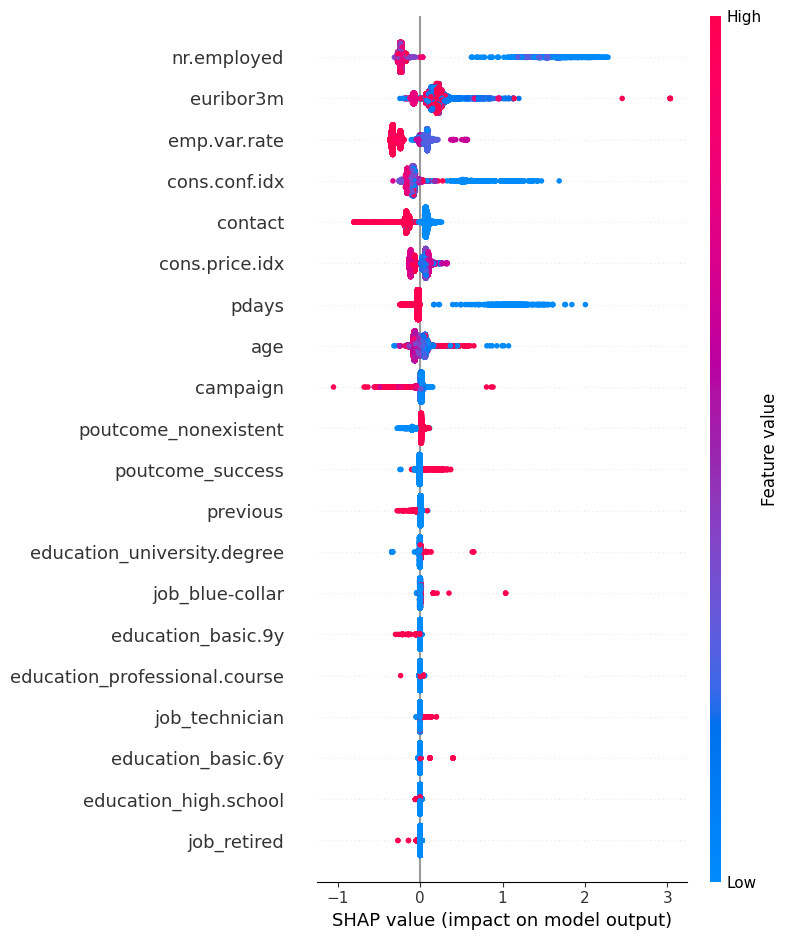

In [59]:
shap.summary_plot(shap_values, x_test)
